In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Data analysis and preparation

In [2]:
import csv

def custom_csv_reader(file_path):
    with open(file_path, 'r') as file:
        # Читаем заголовок
        headers = next(file).strip().split(',')
        
        # Читаем остальные строки
        data = []
        for line in file:
            # Удаляем внешние кавычки и разделяем по запятым
            row = next(csv.reader([line.strip()[1:-1]], quotechar='"', escapechar='\\'))
            # Объединяем столбцы Name и Sex
            name_sex = row[3] + ' ' + row[4]
            new_row = row[:3] + [name_sex] + row[5:]
            data.append(new_row)
    
    return pd.DataFrame(data, columns=headers)

# Чтение данных из CSV файла
df = custom_csv_reader('titanic.csv')

print(df.shape)
print(df.isnull().sum())
df.head()

(418, 12)
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly Mr. James""""",male,34.5,0,0,330911,7.8292,,Q
1,893,1,3,"Wilkes Mrs. James (Ellen Needs)""""",female,47,1,0,363272,7,,S
2,894,0,2,"Myles Mr. Thomas Francis""""",male,62,0,0,240276,9.6875,,Q
3,895,0,3,"Wirz Mr. Albert""""",male,27,0,0,315154,8.6625,,S
4,896,1,3,"Hirvonen Mrs. Alexander (Helga E Lindqvist)""""",female,22,1,1,3101298,12.2875,,S


In [3]:
print(df.Sex.unique())
print(df.Pclass.unique())
print(df.Survived.unique())
print(df.Age.unique())
print(df.SibSp.unique())
print(df.Parch.unique())

['male' 'female']
['3' '2' '1']
['0' '1']
['34.5' '47' '62' '27' '22' '14' '30' '26' '18' '21' '' '46' '23' '63'
 '24' '35' '45' '55' '9' '48' '50' '22.5' '41' '33' '18.5' '25' '39' '60'
 '36' '20' '28' '10' '17' '32' '13' '31' '29' '28.5' '32.5' '6' '67' '49'
 '2' '76' '43' '16' '1' '12' '42' '53' '26.5' '40' '61' '60.5' '7' '15'
 '54' '64' '37' '34' '11.5' '8' '0.33' '38' '57' '40.5' '0.92' '19' '36.5'
 '0.75' '0.83' '58' '0.17' '59' '14.5' '44' '5' '51' '3' '38.5']
['0' '1' '2' '3' '4' '5' '8']
['0' '1' '3' '2' '4' '6' '5' '9']


**Survived:**
- 0 = Did not survive
- 1 = Survived

**Pclass:**
- 1 = 1st class
- 2 = 2nd class
- 3 = 3rd class

**Sibsp:**
- Number of brothers and wife on board


**Embarked:**
- Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)


**Parch:**
- Number of parents and children on board


**Fare:**
- Price


In [4]:
df['Sex'] = df['Sex'].map({
    'male': 0.0, 
    'female': 1.0
})


df['Age'] = df['Age'].replace("", np.nan)
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Age'] = df['Age'].fillna(df['Age'].mean())


df['Survived'] = pd.to_numeric(df['Survived'], errors='coerce')
df['Pclass'] = pd.to_numeric(df['Pclass'], errors='coerce')
df['SibSp'] = pd.to_numeric(df['SibSp'], errors='coerce')
df['Parch'] = pd.to_numeric(df['Parch'], errors='coerce')


print(df.dtypes)
df.head()


PassengerId     object
Survived         int64
Pclass           int64
Name            object
Sex            float64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare            object
Cabin           object
Embarked        object
dtype: object


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly Mr. James""""",0.0,34.5,0,0,330911,7.8292,,Q
1,893,1,3,"Wilkes Mrs. James (Ellen Needs)""""",1.0,47.0,1,0,363272,7,,S
2,894,0,2,"Myles Mr. Thomas Francis""""",0.0,62.0,0,0,240276,9.6875,,Q
3,895,0,3,"Wirz Mr. Albert""""",0.0,27.0,0,0,315154,8.6625,,S
4,896,1,3,"Hirvonen Mrs. Alexander (Helga E Lindqvist)""""",1.0,22.0,1,1,3101298,12.2875,,S


In [5]:
df.Cabin.unique()

array(['', 'B45', 'E31', 'B57 B59 B63 B66', 'B36', 'A21', 'C78', 'D34',
       'D19', 'A9', 'D15', 'C31', 'C23 C25 C27', 'F G63', 'B61', 'C53',
       'D43', 'C130', 'C132', 'C101', 'C55 C57', 'B71', 'C46', 'C116',
       'F', 'A29', 'G6', 'C6', 'C28', 'C51', 'E46', 'C54', 'C97', 'D22',
       'B10', 'F4', 'E45', 'E52', 'D30', 'B58 B60', 'E34', 'C62 C64',
       'A11', 'B11', 'C80', 'F33', 'C85', 'D37', 'C86', 'D21', 'C89',
       'F E46', 'A34', 'D', 'B26', 'C22 C26', 'B69', 'C32', 'B78',
       'F E57', 'F2', 'A18', 'C106', 'B51 B53 B55', 'D10 D12', 'E60',
       'E50', 'E39 E41', 'B52 B54 B56', 'C39', 'B24', 'D28', 'B41', 'C7',
       'D40', 'D38', 'C105'], dtype=object)

In [6]:
row_with_cabin = df[df['Cabin'] == 'B57 B59 B63 B66']
row_with_cabin

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
24,916,1,1,"Ryerson Mrs. Arthur Larned (Emily Maria Borie)""""",1.0,48.0,1,3,PC 17608,262.375,B57 B59 B63 B66,C
64,956,0,1,"Ryerson Master. John Borie""""",0.0,13.0,2,2,PC 17608,262.375,B57 B59 B63 B66,C
142,1034,0,1,"Ryerson Mr. Arthur Larned""""",0.0,61.0,1,3,PC 17608,262.375,B57 B59 B63 B66,C


In [7]:
df['Cabin'] = df['Cabin'].replace("", np.nan)
print(df.isnull().sum())
df['Cabin'] = df['Cabin'].fillna('Unknown')


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [8]:
df_model = df.drop(columns=['Ticket', 'Fare', 'Embarked', 'PassengerId', 'Name'])

# 2. Убеждаемся, что все числовые столбцы имеют тип float
df_model['Survived'] = df_model['Survived'].astype(float)
df_model['Pclass'] = df_model['Pclass'].astype(float)
df_model['Sex'] = df_model['Sex'].astype(float)
# numeric_columns = ['Survived', 'Pclass', 'Sex']  # добавьте другие числовые столбцы, если есть
# df_model[numeric_columns] = df_model[numeric_columns].astype(float)

df_model.dtypes

Survived    float64
Pclass      float64
Sex         float64
Age         float64
SibSp         int64
Parch         int64
Cabin        object
dtype: object

In [9]:
df_model = pd.get_dummies(df_model, columns=['Cabin'], prefix='Cabin') #drop_first=True
print(df_model.dtypes)
df_model.head()

Survived         float64
Pclass           float64
Sex              float64
Age              float64
SibSp              int64
                  ...   
Cabin_F2            bool
Cabin_F33           bool
Cabin_F4            bool
Cabin_G6            bool
Cabin_Unknown       bool
Length: 83, dtype: object


,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin_A11,Cabin_A18,Cabin_A21,Cabin_A29,...,Cabin_E60,Cabin_F,Cabin_F E46,Cabin_F E57,Cabin_F G63,Cabin_F2,Cabin_F33,Cabin_F4,Cabin_G6,Cabin_Unknown
0,0.0,3.0,0.0,34.5,0,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,1.0,3.0,1.0,47.0,1,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,0.0,2.0,0.0,62.0,0,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,0.0,3.0,0.0,27.0,0,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,1.0,3.0,1.0,22.0,1,1,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


# Building a model 

Random Forest - MSE: 0.012317231906513534, R2: 0.9876827680934864


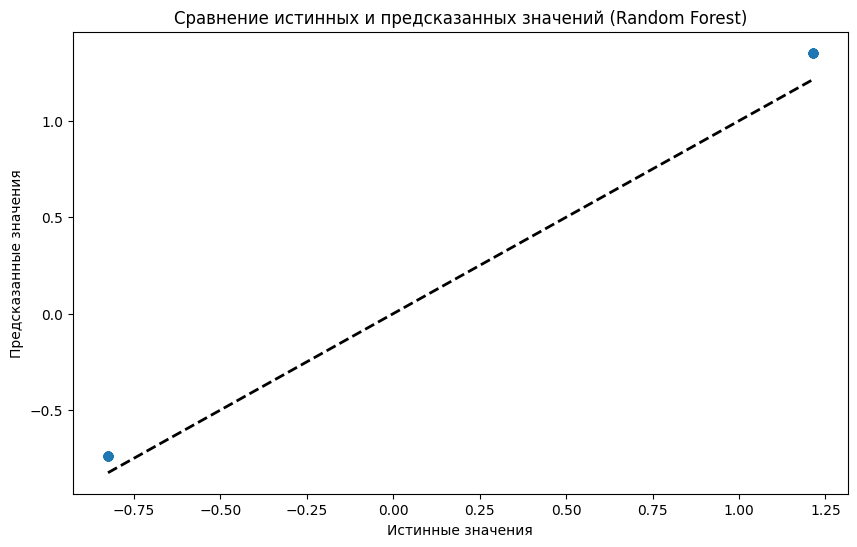

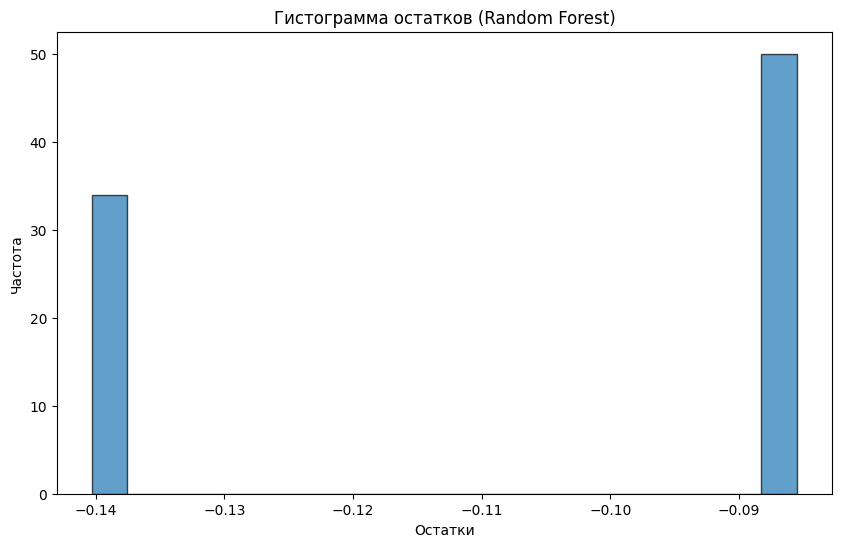

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import  mean_squared_error, r2_score, confusion_matrix
from scipy.stats import skew, kurtosis, iqr



X = df_model.drop('Survived', axis=1)
y = df_model['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test = scaler.fit_transform(y_test.values.reshape(-1, 1)).flatten()


rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest - MSE: {mse_rf}, R2: {r2_rf}")

# Истинные и предсказанные значения
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.title('Сравнение истинных и предсказанных значений (Random Forest)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

# График остатков
residuals = y_test - y_pred_rf
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20, edgecolor='k', alpha=0.7)
plt.xlabel('Остатки')
plt.ylabel('Частота')
plt.title('Гистограмма остатков (Random Forest)')
plt.show()

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



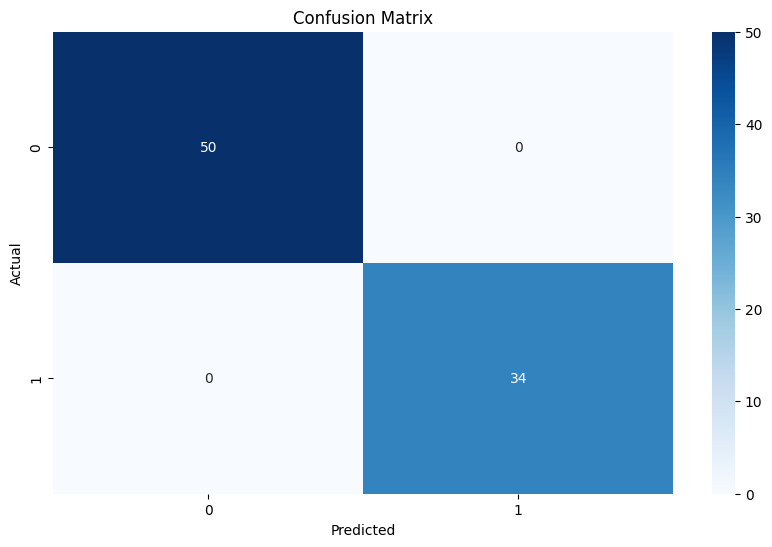

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


X = df_model.drop(columns=['Survived'])
y = df_model['Survived'].astype(int)  # Убедимся, что целевая переменная имеет тип int

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабирование признаков
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Создание и обучение модели RandomForestClassifier
clf_model = RandomForestClassifier(random_state=42)
clf_model.fit(X_train, y_train)

# Прогнозирование на тестовой выборке
y_pred_clf = clf_model.predict(X_test)

# Оценка модели
accuracy = accuracy_score(y_test, y_pred_clf)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred_clf))

# Матрица ошибок
conf_matrix = confusion_matrix(y_test, y_pred_clf)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()